In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 0. Data processing and visualization
1. Investigate the ratings.csv dataset, transform it to $(M,N)$ matrix so that each row represents a movie and each column represents a user. So M = number of unique movies, N = number of unique users. $r_{ij}$ is the rating j-th user gave to i-th movie.
2. Fill N/A values with 0.0
3. Investigate the resulting dataset, remove uninformative columns if any.
4. Perform exploratory analysis on the dataset.(correlation matrix, summary statistics barplots of features)

In [198]:
ratings = pd.read_csv("ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [199]:
# TODO

In [200]:
# we see that the dataset does not contain nan values.
np.any(ratings.isna())

False

In [201]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [202]:
rating_df = pd.DataFrame(index=np.sort(ratings["movieId"].unique()), columns=np.sort(ratings["userId"].unique()))

In [203]:
rating_df

,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
rating_df.iloc[318, 2]

nan

In [205]:
for user_id in np.sort(ratings["userId"].unique()):
    
    user_df = ratings[ratings["userId"] == user_id]
    
    for i, movie_id in zip(user_df.index, user_df["movieId"]):
        rating_df.loc[movie_id, user_id] = user_df["rating"][i]

In [206]:
for i in rating_df.columns:
    if np.all(rating_df[i] == np.nan) == True:
        raise Exception(f"{i}th user does not have any ratings.")

In [207]:
rating_df.fillna(0, inplace=True)

In [208]:
rating_df

,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [209]:
def get_user_rating(i, j):
    return rating_df[i][j]

get_user_rating(1, 1)

4.0

In [210]:
rating_df.corr()

,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
1,1.000000,0.019400,0.053056,0.176920,0.120866,0.104418,0.143793,0.128547,0.055268,-0.000298,...,0.066256,0.149942,0.186978,0.056530,0.134412,0.121981,0.254200,0.262241,0.085434,0.098719
2,0.019400,1.000000,-0.002594,-0.003804,0.013183,0.016257,0.021567,0.023750,-0.003448,0.061880,...,0.198549,0.010888,-0.004030,-0.005345,-0.007919,0.011299,0.005813,0.032730,0.024373,0.089329
3,0.053056,-0.002594,1.000000,-0.004556,0.001887,-0.004577,-0.005634,0.001703,-0.003111,-0.005501,...,0.000150,-0.000585,0.011211,-0.004822,0.003678,-0.003246,0.012885,0.008096,-0.002963,0.015962
4,0.176920,-0.003804,-0.004556,1.000000,0.121018,0.065719,0.100602,0.054235,0.002417,0.015615,...,0.072848,0.114287,0.281866,0.039699,0.065493,0.164831,0.115118,0.116861,0.023930,0.062523
5,0.120866,0.013183,0.001887,0.121018,1.000000,0.294138,0.101725,0.426576,-0.004185,0.023471,...,0.061912,0.414931,0.095394,0.254117,0.141077,0.090158,0.145764,0.122607,0.258289,0.040372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.121981,0.011299,-0.003246,0.164831,0.090158,0.047506,0.172499,0.081913,0.057989,0.054877,...,0.153892,0.084208,0.224637,0.035251,0.106752,1.000000,0.115999,0.188354,0.052385,0.093851
607,0.254200,0.005813,0.012885,0.115118,0.145764,0.142169,0.173293,0.178133,0.003257,-0.004809,...,0.080034,0.187588,0.173025,0.126267,0.101138,0.115999,1.000000,0.258245,0.142533,0.098518
608,0.262241,0.032730,0.008096,0.116861,0.122607,0.137954,0.305439,0.175912,0.086229,0.048373,...,0.136316,0.174069,0.164479,0.133734,0.144896,0.188354,0.258245,1.000000,0.109563,0.248944
609,0.085434,0.024373,-0.002963,0.023930,0.258289,0.207124,0.084494,0.421627,-0.003937,0.014983,...,0.029664,0.331053,0.046000,0.232115,0.089810,0.052385,0.142533,0.109563,1.000000,0.033713


In [174]:
rating_df.var()

1      0.459269
2      0.048226
3      0.040787
4      0.312799
5      0.063907
         ...   
606    1.418162
607    0.288229
608    0.867238
609    0.041293
610    1.676323
Length: 610, dtype: float64

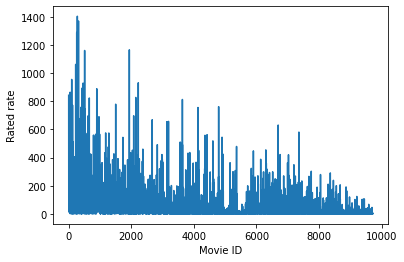

In [211]:
plt.plot(rating_df.values.sum(axis=1))
plt.xlabel("Movie ID")
plt.ylabel("Rated rate")
plt.show()

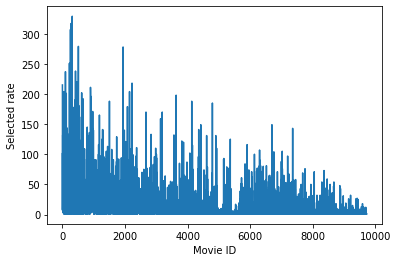

In [212]:
plt.plot((rating_df.values != 0).sum(axis=1))
plt.xlabel("Movie ID")
plt.ylabel("Selected rate")
plt.show()

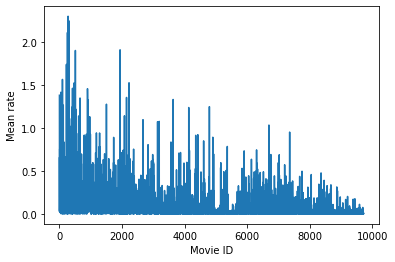

In [213]:
plt.plot(rating_df.values.mean(axis=1))
plt.xlabel("Movie ID")
plt.ylabel("Mean rate")
plt.show()

## 1. Reducing Dimentionality of Data
All clustering algorithms benefit from dimensionality reduction. In this task perform PCA and project the dataset to lower dimension. Preserve at least 0.9 of initial variance

In [214]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

import time

# TODO

In [215]:
scaler = MinMaxScaler((0, 1))

X = scaler.fit_transform(rating_df.values)

In [221]:
X

array([[0.8 , 0.  , 0.  , ..., 0.5 , 0.75, 1.  ],
       [0.  , 0.  , 0.  , ..., 0.4 , 0.  , 0.  ],
       [0.8 , 0.  , 0.  , ..., 0.4 , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [222]:
n_comp_results = {}

pca = PCA(300)

new_x = pca.fit_transform(X)

result_dict = {i : np.sum(pca.explained_variance_ratio_[:i]) for i in range(len(pca.explained_variance_ratio_))}

In [230]:
result_dict[250]
optimal_n = 250

In [231]:
X

array([[0.8 , 0.  , 0.  , ..., 0.5 , 0.75, 1.  ],
       [0.  , 0.  , 0.  , ..., 0.4 , 0.  , 0.  ],
       [0.8 , 0.  , 0.  , ..., 0.4 , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [234]:
optimal_pca = PCA(optimal_n)
optimal_pca.fit(X)
reduced_X = optimal_pca.transform(X)

Here we can see that PCA sufferse from crowding problem, because of the curse of dimentionality. It cannot represent data with 2 components.

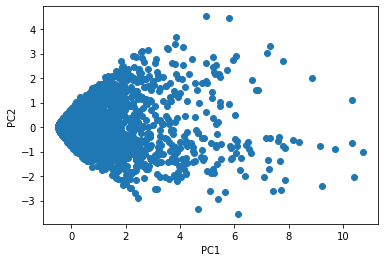

In [253]:
x = PCA(2).fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.scatter(x[:, 0], x[:, 1])
plt.show()

## 2. Clustering
1. On the projected dataset fit KMeans, choose the best k from values $1,2,...,30$, report silhouette score of the best k
2. On the projected dataset decide minPts and eps, afterwards fit DBSCAN with chosen params, report the silhouette score
3. On the projected dataset fit 3 affinity propagation models, by setting preference to minimum of similarity matrix, mean of similarity matrix, median of similarity matrix.
Report the silhouette scores and choose the best one according to it.
4. Use scipy.cluster.hierarchy.linkage and scipy.cluster.hierarchy.dendrogram to plot dendrograms for [single, average, ward] linkages. Choose best k for each linkages from the dendrograms. Fit aglomerative clustering using the k-s that you chose. Report the three silhouette scores and choose the best model. Use the projected dataset for this task too.


###### 1

In [294]:
# TODO
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.model_selection import KFold

import itertools as it

In [273]:
def within_cluster_sum_of_squares(center, X):
    return np.linalg.norm(center - X, axis=1).sum()

In [276]:
within_cluster_sum_of_squares(X[0], X)

114357.22538327066

In [308]:
# since we don't have labels we cannot do any label dependent evaluation, 
# will evaluate with within other metrics.

def fit_clustering_algo(est, param_grid, X_train):
    
    loss = []
    sil_scores = []
    param_dicts = []

    results = {}

    for args in it.product(*param_grid.values()):
        
        param_dict = {k : a for k, a in zip(param_grid.keys(), args)}

        algo = est(**param_dict)

        print(f"Fitting with {param_dict}.")

        algo.fit(X_train)

        labels = algo.predict(X_train)
        unique_labels = np.unique(labels)

        commulative_loss = 0

        for i in unique_labels:
            X_cluster = X_train[labels == i]
            commulative_loss += within_cluster_sum_of_squares(algo.cluster_centers_[i], X_cluster)
            
        param_dicts.append(param_dict)
        loss.append(commulative_loss / len(unique_labels))
        sil_scores.append(silhouette_score(X_train, labels))
        
    results = {
        "args" : param_dicts,
        "within_cluster_sum_of_squares" : loss,
        "silhouette_score" : sil_scores
    }
    
    return results

In [333]:
results = fit_clustering_algo(KMeans, {"n_clusters" : np.arange(2, 31, 1)}, reduced_X)

Fitting with {'n_clusters': 2}.
Fitting with {'n_clusters': 3}.
Fitting with {'n_clusters': 4}.
Fitting with {'n_clusters': 5}.
Fitting with {'n_clusters': 6}.
Fitting with {'n_clusters': 7}.
Fitting with {'n_clusters': 8}.
Fitting with {'n_clusters': 9}.
Fitting with {'n_clusters': 10}.
Fitting with {'n_clusters': 11}.
Fitting with {'n_clusters': 12}.
Fitting with {'n_clusters': 13}.
Fitting with {'n_clusters': 14}.
Fitting with {'n_clusters': 15}.
Fitting with {'n_clusters': 16}.
Fitting with {'n_clusters': 17}.
Fitting with {'n_clusters': 18}.
Fitting with {'n_clusters': 19}.
Fitting with {'n_clusters': 20}.
Fitting with {'n_clusters': 21}.
Fitting with {'n_clusters': 22}.
Fitting with {'n_clusters': 23}.
Fitting with {'n_clusters': 24}.
Fitting with {'n_clusters': 25}.
Fitting with {'n_clusters': 26}.
Fitting with {'n_clusters': 27}.
Fitting with {'n_clusters': 28}.
Fitting with {'n_clusters': 29}.
Fitting with {'n_clusters': 30}.


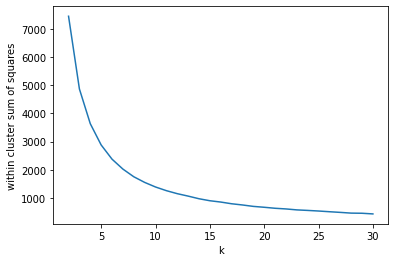

In [366]:
k_values = list(map(lambda x : x["n_clusters"], results["args"]))

plt.plot(k_values, results["within_cluster_sum_of_squares"])
plt.xlabel("k")
plt.ylabel("within cluster sum of squares")
plt.show()

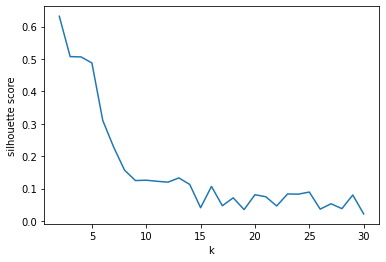

In [367]:
plt.plot(k_values, results["silhouette_score"])
plt.xlabel("k")
plt.ylabel("silhouette score")
plt.show()

It is obvioise that k = 30 gives the best performance. However we could take k between 10-15 using elbow method.

######  2

In [336]:
# TODO
from sklearn.cluster import DBSCAN

In [351]:
def fit_dbscan_algo(est, param_grid, X_train):
    
    labels = []
    sil_scores = []
    param_dicts = []

    results = {}

    for args in it.product(*param_grid.values()):
        
        param_dict = {k : a for k, a in zip(param_grid.keys(), args)}

        algo = est(**param_dict)

        print(f"Fitting with {param_dict}.")

        algo.fit(X_train)
            
        param_dicts.append(param_dict)
        labels.append(algo.labels_)
        sil_scores.append(silhouette_score(X_train, algo.labels_))
        
    results = {
        "args" : param_dicts,
        "labels" : labels,
        "silhouette_score" : sil_scores
    }
    
    return results

In [361]:
dbscan = DBSCAN(eps=3, min_samples=2)
dbscan.fit(reduced_X)

DBSCAN(eps=3, min_samples=2)

In [355]:
dbscan_param_grid = {
    "eps" : np.linspace(1, 10, 10),
    "min_samples" : np.arange(2, 10)
}

In [360]:
dbscan_results = fit_dbscan_algo(DBSCAN, dbscan_param_grid, reduced_X)

Fitting with {'eps': 1.0, 'min_samples': 2}.
Fitting with {'eps': 1.0, 'min_samples': 3}.
Fitting with {'eps': 1.0, 'min_samples': 4}.
Fitting with {'eps': 1.0, 'min_samples': 5}.
Fitting with {'eps': 1.0, 'min_samples': 6}.
Fitting with {'eps': 1.0, 'min_samples': 7}.
Fitting with {'eps': 1.0, 'min_samples': 8}.
Fitting with {'eps': 1.0, 'min_samples': 9}.
Fitting with {'eps': 2.0, 'min_samples': 2}.
Fitting with {'eps': 2.0, 'min_samples': 3}.
Fitting with {'eps': 2.0, 'min_samples': 4}.
Fitting with {'eps': 2.0, 'min_samples': 5}.
Fitting with {'eps': 2.0, 'min_samples': 6}.
Fitting with {'eps': 2.0, 'min_samples': 7}.
Fitting with {'eps': 2.0, 'min_samples': 8}.
Fitting with {'eps': 2.0, 'min_samples': 9}.
Fitting with {'eps': 3.0, 'min_samples': 2}.
Fitting with {'eps': 3.0, 'min_samples': 3}.
Fitting with {'eps': 3.0, 'min_samples': 4}.
Fitting with {'eps': 3.0, 'min_samples': 5}.
Fitting with {'eps': 3.0, 'min_samples': 6}.
Fitting with {'eps': 3.0, 'min_samples': 7}.
Fitting wi

As eps goes larger the silhouette decreases.

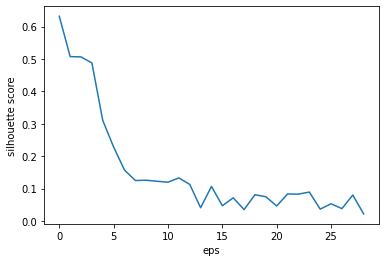

In [388]:
eps_values = list(map(lambda x : x["eps"], dbscan_results["args"]))

plt.plot(results["silhouette_score"])
plt.xlabel("eps")
plt.ylabel("silhouette score")
plt.show()

We could take 11-12 for ep.

###### 3

###### 4

In [425]:
# TODO
from scipy.cluster import hierarchy
import random

import sys
sys.setrecursionlimit(10000)

In [464]:
# reduce the number of samples to get faster computations
sampled_X = reduced_X[np.random.permutation(len(reduced_X))[:1000]]

In [465]:
single_linkage = hierarchy.linkage(sampled_X, "single")
average_linkage = hierarchy.linkage(sampled_X, "average")
ward_linkage = hierarchy.linkage(sampled_X, "ward")

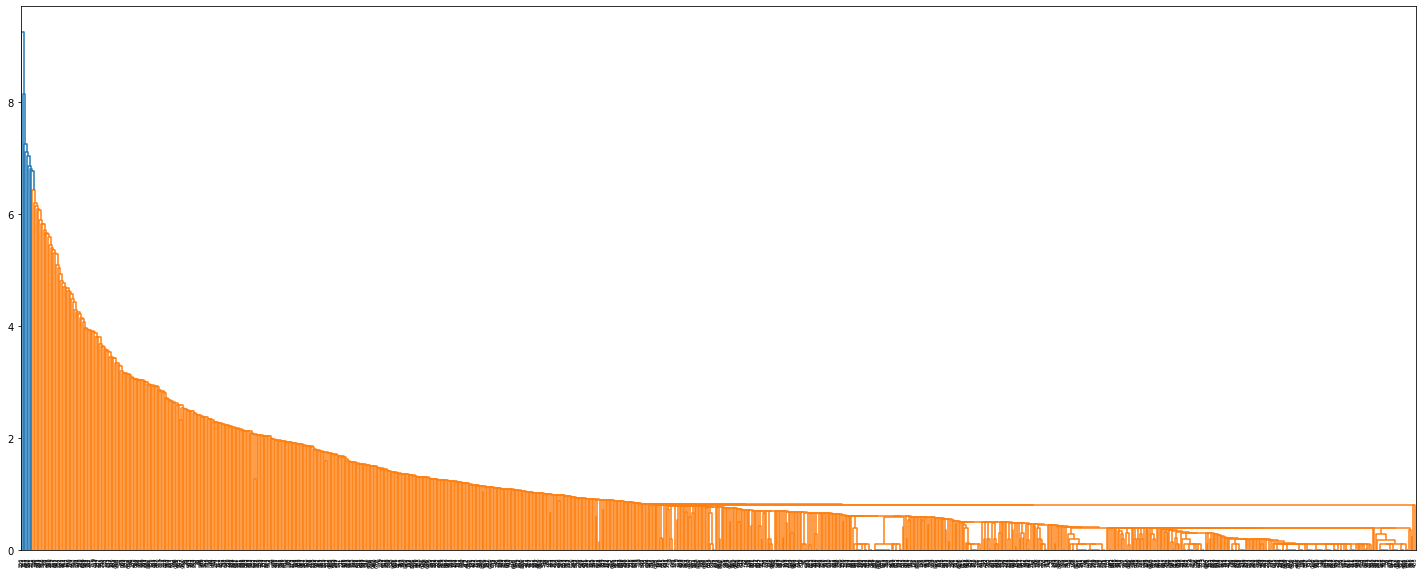

In [466]:
fig, ax = plt.subplots(figsize=(25, 10))
dn = hierarchy.dendrogram(single_linkage)
plt.show()

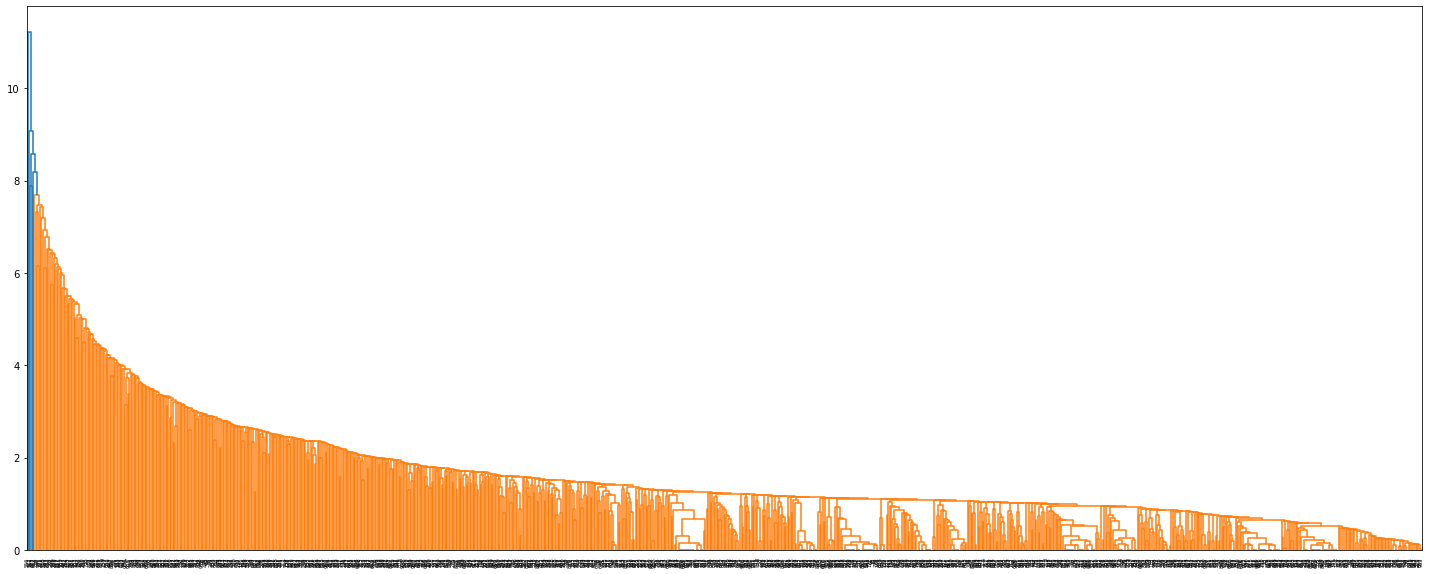

In [467]:
fig, ax = plt.subplots(figsize=(25, 10))
dn = hierarchy.dendrogram(average_linkage)
plt.show()

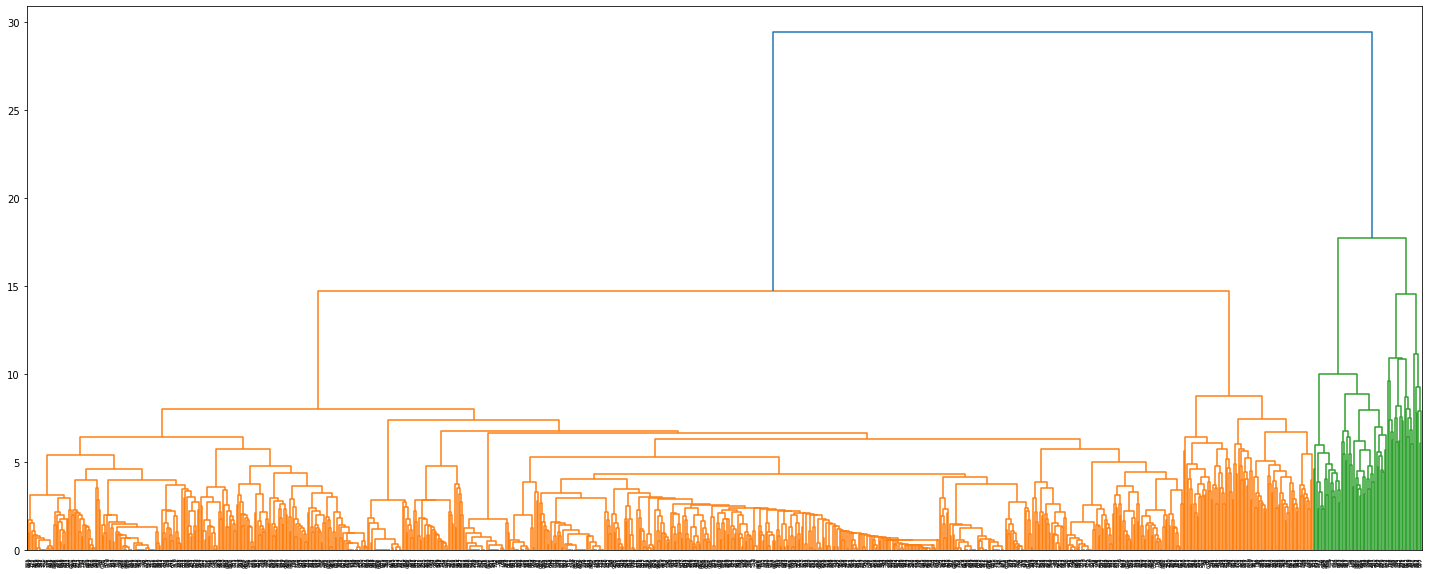

In [468]:
fig, ax = plt.subplots(figsize=(25, 10))
dn = hierarchy.dendrogram(ward_linkage)
plt.show()

**The first two gave very unrepresentative plots, but the one with "word" option is quite clear. Here we can for example choose 3 or 5 clusters.**

In [471]:
for cut in [29, 20, 17, 14]:
    cutree = hierarchy.cut_tree(ward_linkage, height=cut).flatten()
    print(f"for height {cut} the silhouette score is", silhouette_score(sampled_X, cutree))

for height 29 the silhouette score is 0.5770128501679905
for height 20 the silhouette score is 0.5770128501679905
for height 17 the silhouette score is 0.5092279660991972
for height 14 the silhouette score is 0.40140394058750134


## 3. Performing clustering and visualising the clusters
1. Use the projected dataset you got from task 1 project it to 2D using t-SNE(sklearn.manifold.TSNE). On the t-SNE projected dataset perform the same tasks as in task 2. 
2. Make four scatter plots for the four best models you got in task 3.1, by coloring points according to their cluster.
3. Using the model with the best silhouette score examine some movies that are in the same cluster, what do the clusters show?

In [472]:
# TODO
from sklearn.manifold import TSNE

In [517]:
t_sne = TSNE(3, perplexity=40.0, verbose=2, n_iter=1000)

In [518]:
X_embedded = t_sne.fit_transform(reduced_X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9724 samples in 0.002s...
[t-SNE] Computed neighbors for 9724 samples in 2.917s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9724
[t-SNE] Computed conditional probabilities for sample 2000 / 9724
[t-SNE] Computed conditional probabilities for sample 3000 / 9724
[t-SNE] Computed conditional probabilities for sample 4000 / 9724
[t-SNE] Computed conditional probabilities for sample 5000 / 9724
[t-SNE] Computed conditional probabilities for sample 6000 / 9724
[t-SNE] Computed conditional probabilities for sample 7000 / 9724
[t-SNE] Computed conditional probabilities for sample 8000 / 9724
[t-SNE] Computed conditional probabilities for sample 9000 / 9724
[t-SNE] Computed conditional probabilities for sample 9724 / 9724
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.535s
[t-SNE] Iteration 50: error = 90.1083221, gradient norm = 0.0004249 (50 iterations in 7.917s)
[t-SNE] Iteration 100:

In [481]:
ward_linkage = hierarchy.linkage(reduced_X, "ward")

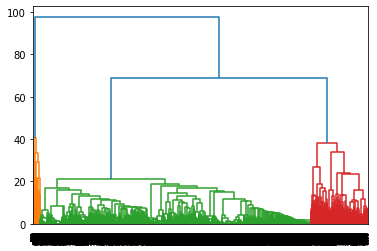

In [482]:
hierarchy.dendrogram(ward_linkage)
plt.show()

In [559]:
hierarchical_clustering = hierarchy.cut_tree(ward_linkage, height=55).flatten()

unique labels [0 1 2]


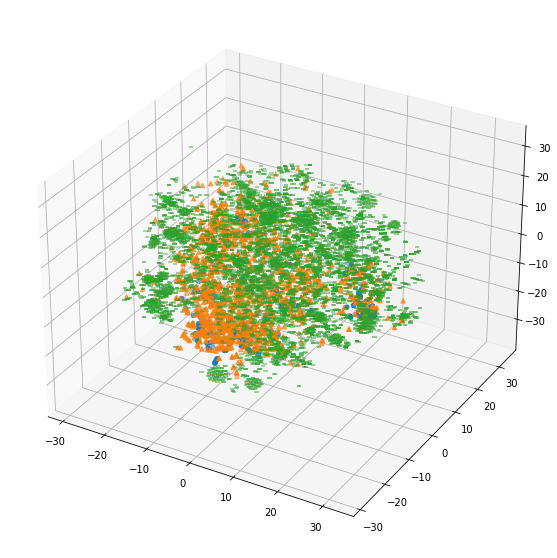

In [560]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")

u_l = np.unique(hierarchical_clustering)
print("unique labels", u_l)

for l, m in zip(u_l, ["o", "^", "_"]):
    X_cluster = X_embedded[hierarchical_clustering == l]
    ax.scatter(X_cluster[:, 0], X_cluster[:, 1], X_cluster[:, 2], marker=m)

In [548]:
dbscan = DBSCAN(eps=5, min_samples=9).fit(reduced_X)

unique labels [-1  0]


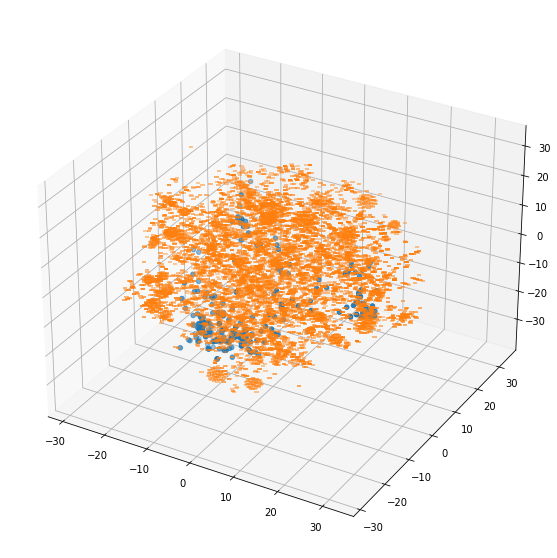

In [554]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")

u_l = np.unique(dbscan.labels_)
print("unique labels", u_l)

for l, m in zip(u_l, ["o", "_", "^"]):
    X_cluster = X_embedded[dbscan.labels_ == l]
    ax.scatter(X_cluster[:, 0], X_cluster[:, 1], X_cluster[:, 2], marker=m)